# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

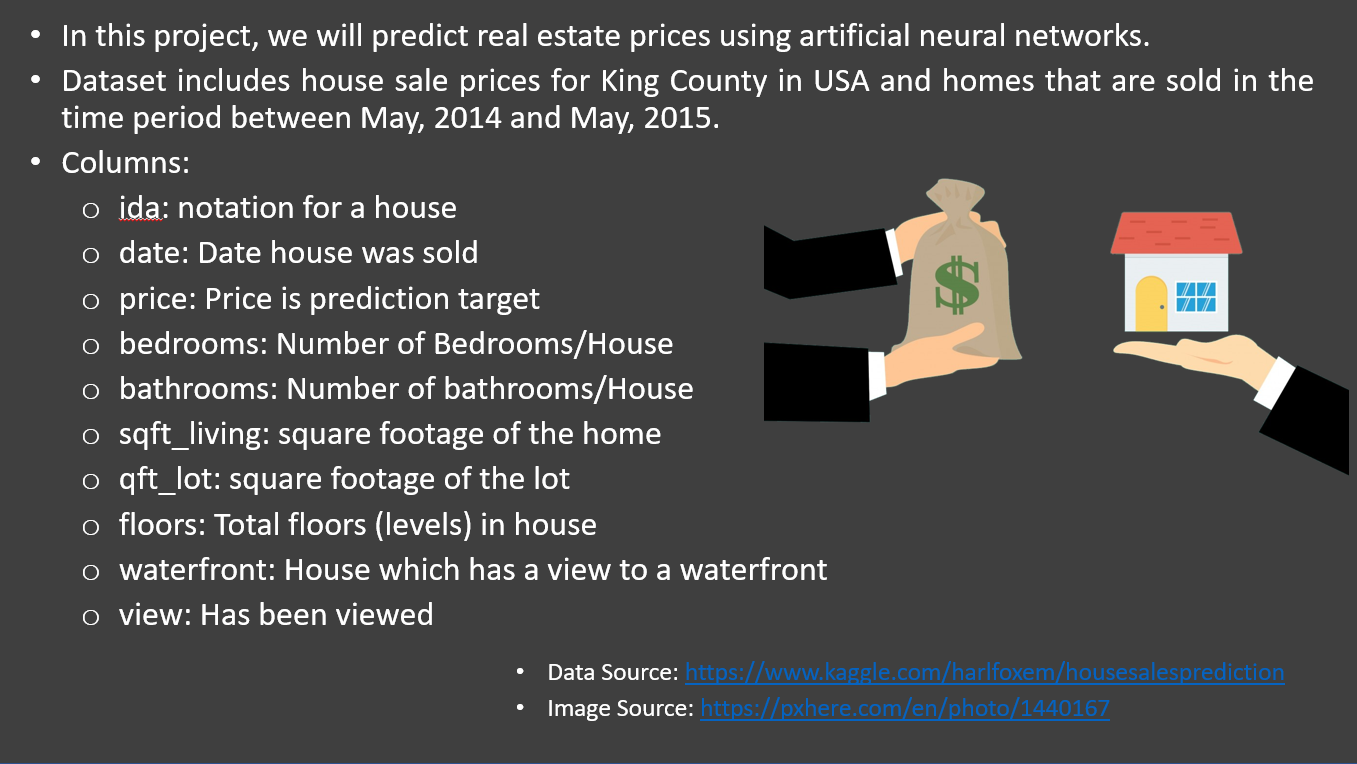

We have the __price__ which is our prediction target.
This is the target variable that we're trying to predict.
So when we train our deep learning model, the output is going
to be the price of the house.
And please note because the output is a continuous output
which is the price could be any value, maybe like 100,000 or maybe $500,000 or maybe 250 and, and so on.
Because the price here is continuous output then this is what
we call it, ***Regression type*** problems. It's not a classification type problems.


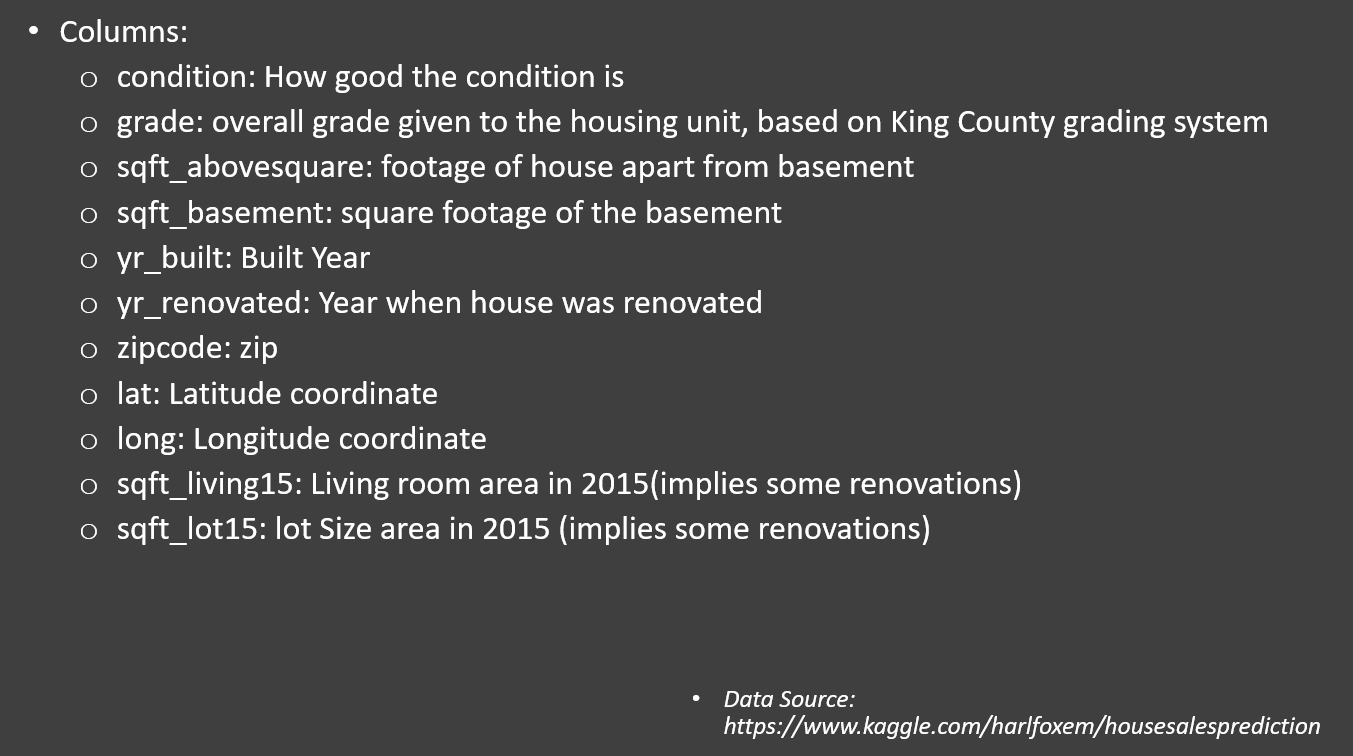

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd # sort of like excel in python
import numpy as np # for numerical analysis at array manipulation
import seaborn as sns # used for data visualiztion
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
house_df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')

In [3]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The price column is the output that we'll be trying to predict.

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


What we get here is the number of entries, which is 21,613 entries.
And the range between zero and 21 612.
Here we have all these different columns.
So we have the I. D.,
the bedrooms and so on.
And here it shows us that we do not have any
missing or null elements in our data frame.
So in each of these columns we have 21-613 non null
elements.
And it looks like we don't have any missing information which
is great.
And here we have the data type for each of the individual
columns in our data frame. And then finally what we got here is
the memory usage. So this data frame simply consumes around three MB in memory.

**Extra Task#1:**
- **What is the average house price?**
- **What is the price of the cheapest house?**
- **What is the average number of bathrooms and bedrooms? round your answer to the lowest value**
- **What is the maximum number of bedrooms?**

In [7]:
print('The average house price is:', house_df['price'].mean())
print('The price of the cheapest house is:', house_df['price'].min())
print('The average number of bathrooms is: ', round(house_df['bathrooms'].mean()))
print('The average number of bedrooms is: ', round(house_df['bedrooms'].mean()))
print('The maximum number of bedrooms is: ', house_df['bedrooms'].max())

The average house price is: 540088.1417665294
The price of the cheapest house is: 75000.0
The average number of bathrooms is:  2
The average number of bedrooms is:  3
The maximum number of bedrooms is:  33


In [8]:
# or for a quick statistical analysis, use the following code
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# TASK #3: PERFORM DATA VISUALIZATION

let's plot the square foot of the living versus the price. 
Maybe I wanted to explore if there is any relationship 
between these. As the square footage of the house increases
maybe the price will tend to increase too.

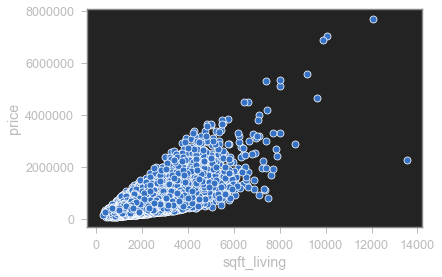

In [9]:
sns.scatterplot(x='sqft_living', y='price', data=house_df)

What we see here is, as a square footage tend
to increase here, the price tend to increase
as well at the house. That makes complete sense.
And this confirmed that the data at least
makes sense from a very high level.
Okay, next we wanted to plot the histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BB55A1888>,
      dtype=object)

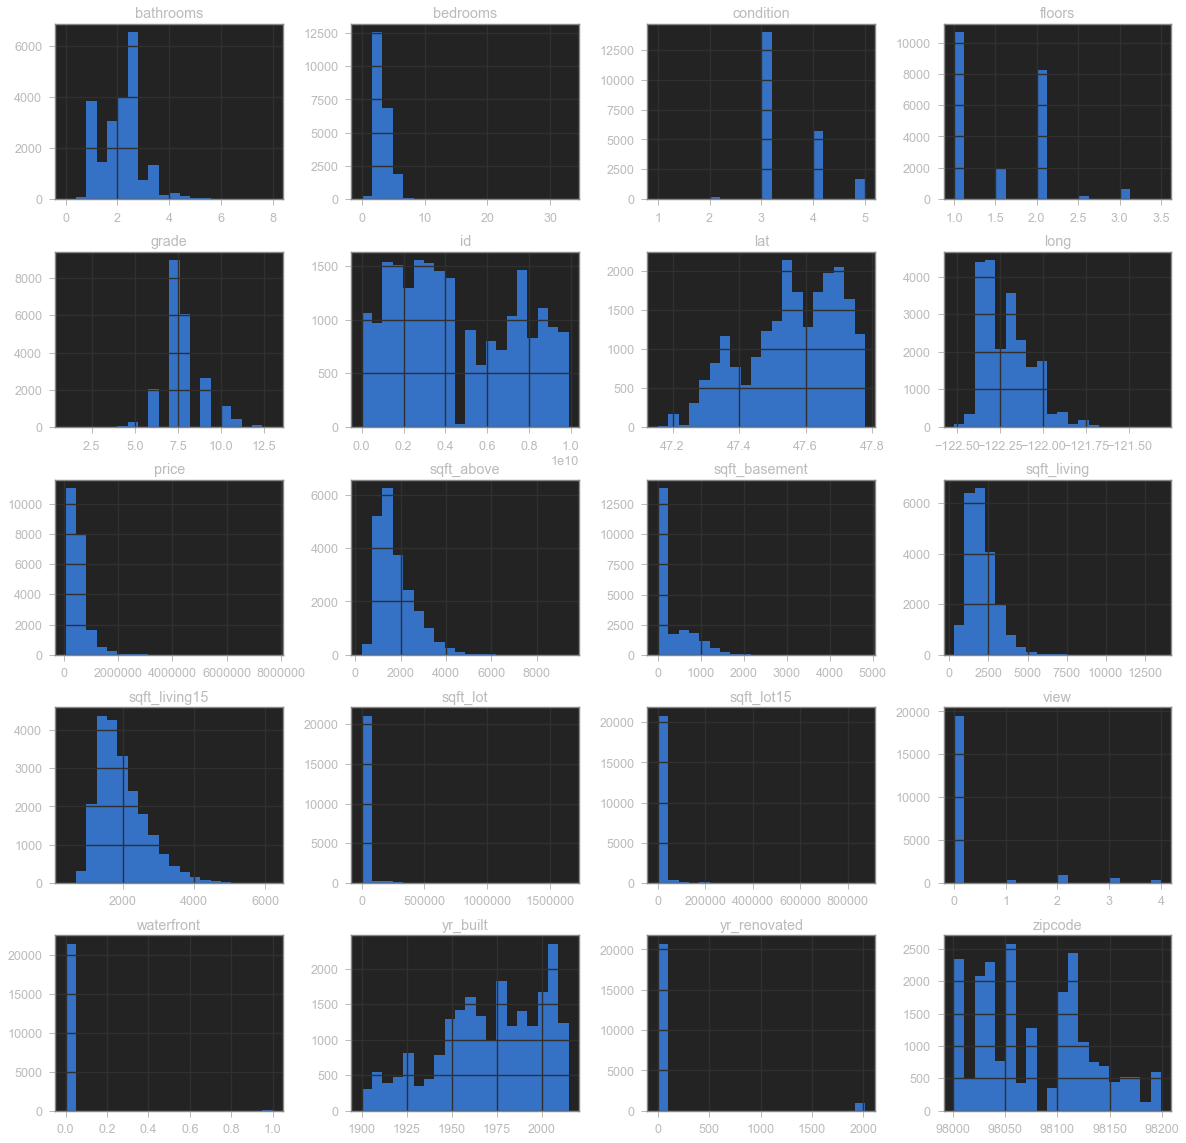

In [10]:
house_df.hist(bins=20, figsize=(20,20), color='b')

It might take some time for it to run.
Now what we got here is a histogram
of all the different features that we have in our data.

For example, what we see here, sqft_living histogram, this is simply
the distribution of the square footage of the living.
So it looks like most of the houses are between, let's say, 
1800 in 2000 square foot.
And then it tends to go down, like ccount
or the number of samples that we have in our data, as we increase the square footage, which is of course
makes sense because it's not common to see
houses, let's say, 6000 square foot for example which are very
rare. However, in 2000 most of the houses lie
within that range.

Another point, the year built, it looks like a lot of houses
are being built after the year 2000 for example.

Next we wanted to plot the
correlation matrix to analyze and see if there's
any correlations between our features.

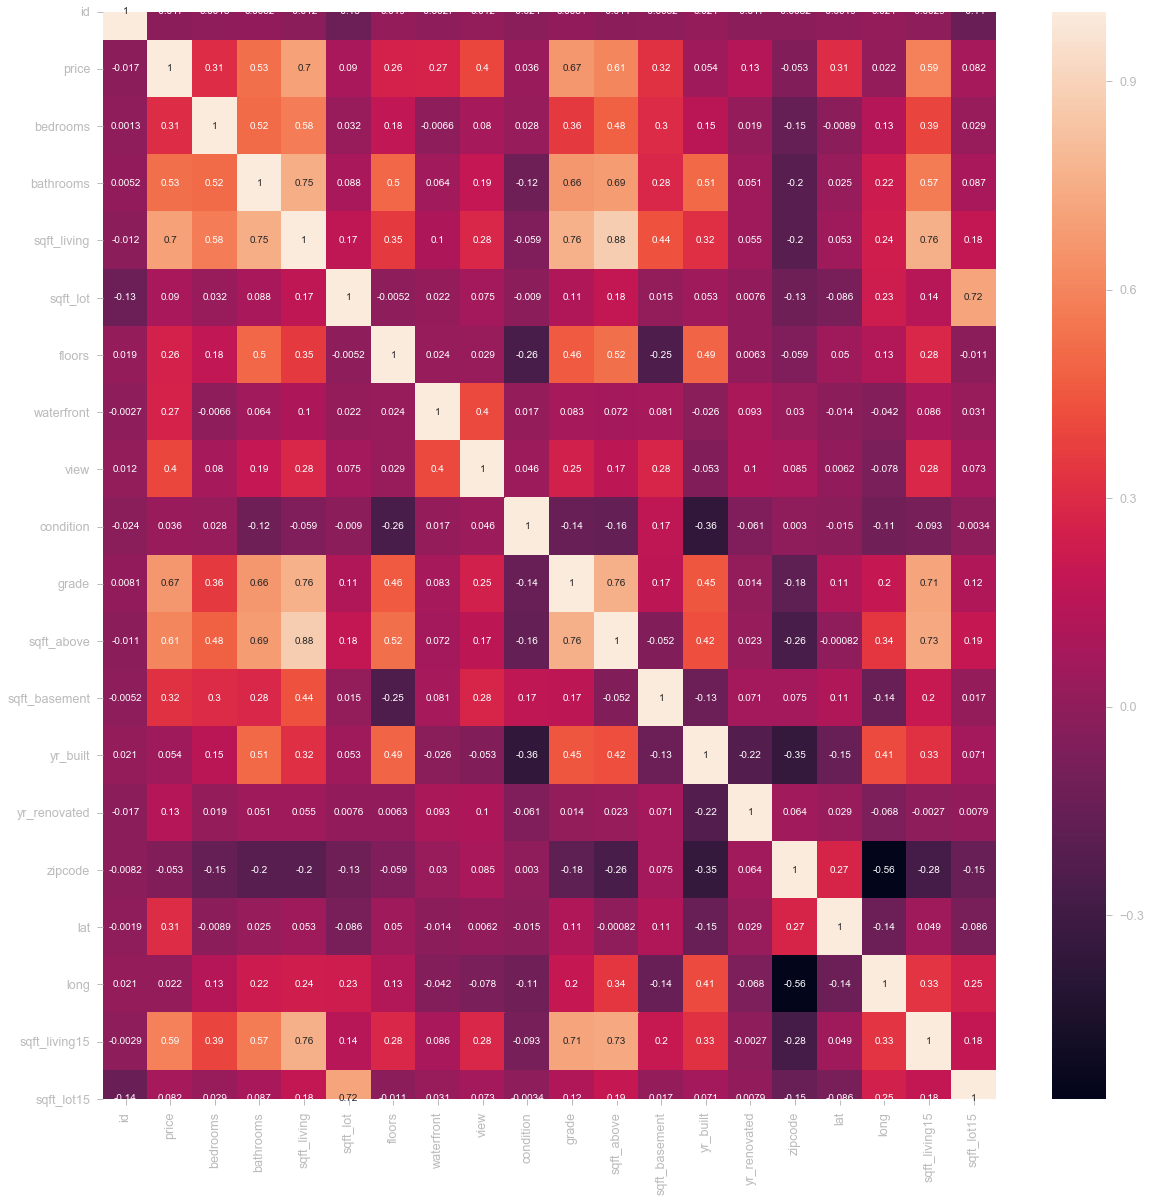

In [11]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True)

So what wes see here is a matrix that 
simply shows us all the different correlations
between the features.
So for example, what we see in price in x-axis is we have a positive
correlation between the square foot
of the living(2015) and the price. Which makes sense
as the square footage increases, the price of the house tend
to increase as well.
If we go up and see a square foot of the living (in general) in y-axis we have 0.7 which is a very strong correlation
between the square foot of the living and the price.
Which makes sense.

Also we have positive correlation between the number
of bathrooms and the price, which makes sense as the number of bathrooms tend
to increase in the house, maybe the square footage tend to increase and of course
that will be reflected on the price as well of the house.

Same deal as well for the bedrooms.
It's a little bit less positive correlation, but it's still
considered Positive correlation here.

Next, we wanted to select a sample
of our features and we're going to call them house_df_sample.
So basically we're doing this because think of it as more
of like scaled down version of our data, including only
a couple of features that we're going to take and leverage
in the next task.

In [12]:
house_df_sample = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built' ]]

In [13]:
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


**Extra Task#2:**
- **Using Seaborn, plot the pairplot for the features contained in "house_df_sample"**
- **Explore the data and perform sanity check**

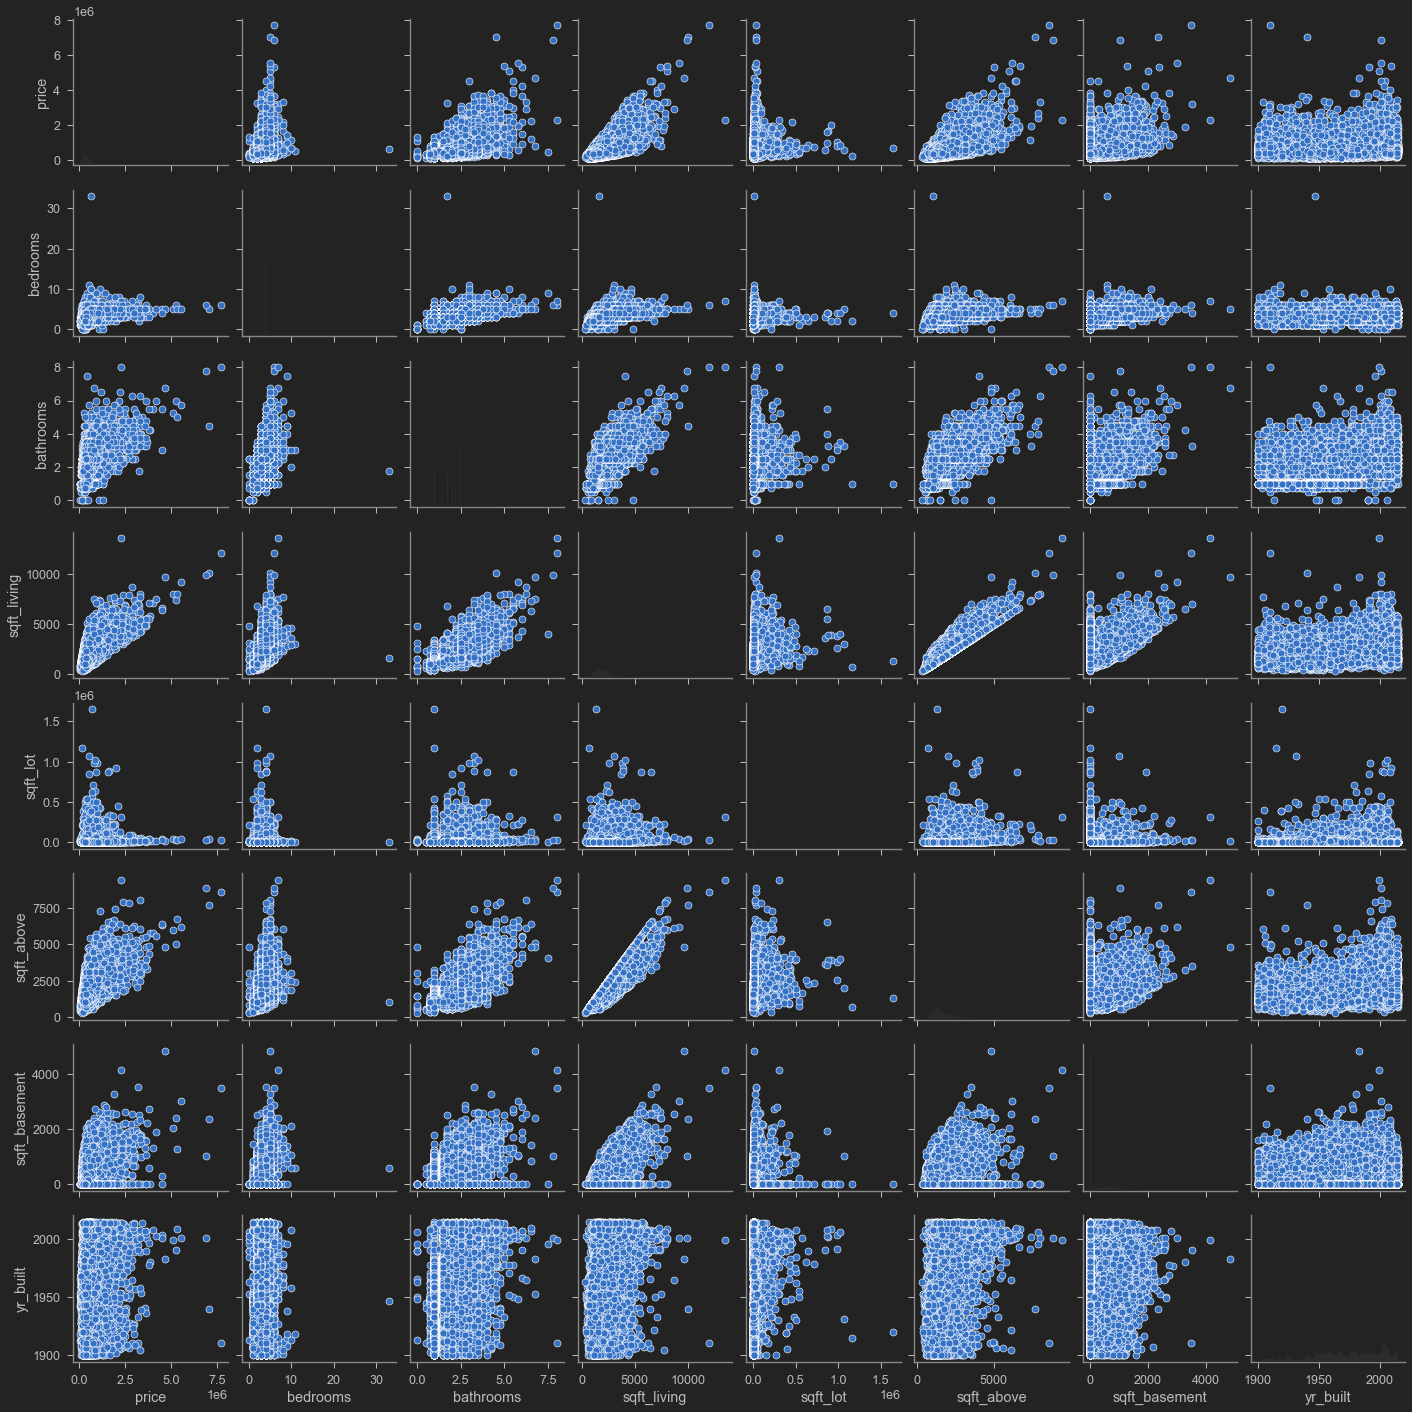

In [14]:
sns.pairplot(house_df_sample)

What we see here is all the different the pair plot showing all the different combinations
of the features.
So for example, if we check the price,
this curve here shows the price versus my square foot of the living. Which makes
sense as a square foot of the living tend to increase
the price as well of the property tend to increase as well.

Another data that looks like there is a more of a trend
or correlation between the two is the square footage of the above. As the square
foot of the above tend to increase, you will find that the price as well of the property tend
to increase to. We also have some sort of relationship
between the number of bathrooms and the square foot
of the living, which makes sense as a number of bathrooms
tends to increase, these bathrooms need to have space
somewhere and that's why the square foot of the living tend
to increase as well.

# TASK #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING

What we're going to do first is to train two deep learning models.
The first one is going to be trained with only select few
number of features.

We are going to try to explore and assess the performance of the trained model and then afterwards we're going to use the full data set to train the model and see if that improves the performance or not.

In [15]:
# First, create a varaible and store the features that we're planning to select.
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [16]:
X = house_df[selected_features]

In [17]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


So instead of using all the different
columns I ended up only with seven columns.

In [18]:
# Next, we're going to use the the price of the house as the output
y = house_df['price']

In [19]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [20]:
X.shape

(21613, 7)

Our X has 21613 rows and 7 columns.

In [21]:
y.shape

(21613,)

Our y has 21613 rows but only one column.

In [22]:
# Data Scaling
# Load MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# then instantiate an object
scaler = MinMaxScaler()
# use the fit transform method
# then pass our X and store it in a new variable
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

What we notice here is simply we took the data which is
the 'X' data frame. And because we have a lot of features that are at a different
scale compared to the remaining features, such as let's say
bathrooms for example, we're talking about from range
between one bathroom to let's say like 50 bathrooms max
per house for example However, for the square foot of the lot we're talking
about like 2000 and maybe 5000. So the scale is different.

So whenever we take that data and we wanted to train
a deep learning model, we want to make sure that all
these features are equally represented.
Basically we want to make sure that, let's say the square foot of the lot,
does not dominate the other features that running a different
scale such as bedrooms and bathrooms.

Simply, what we did here is just to use the MinMaxScaler
and scale the data accordingly so all of them are at the same scale.

In [24]:
# If you check out the shape right now, nothing will change.
# We still have the same features
X_scaled.shape

(21613, 7)

In [25]:
# check out the max of the data
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [26]:
# check out the min of the data
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [27]:
# We're going to reshape the output.
y = y.values.reshape(-1,1)

In [28]:
# We're going to do the same as well for the scaler for the output two.
y_scaled = scaler.fit_transform(y)

In [29]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

So now we have scaled the input and scaled the output and now we're
ready for the next task where we're going to train
a deep learning model with limited number of features.

# TASK #5: TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES

So what we wanted to do right now is first split our data into training and testing.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [31]:
# confirm X_train shape
X_train.shape

(16209, 7)

What we see here is the bulk or the majority of the data, almost 75% of the data has been allocated to the training. We have 16,000 samples.

In [32]:
# confirm X_test shape
X_test.shape

(5404, 7)

For the testing data, we have around
5400.

Please note that there is a big difference
between the training data and testing data.
We generally use the bulk of the data to train our model.
And then once the model is trained, we freeze those weights, we freeze those connections
between the neurons.
And then we assess the performance of the network on a completely new data set that the model
has never seen before during training.
And that's the idea. We wanted to make sure that
these deep neural network models are able to generalize
and not memorize the training data.

Next, we're going to use tensorflow and use keras api.
Keras is a high level api that could be used to build really powerful deep
neural network models with very simple lines of code.

In [48]:
import tensorflow.keras
# import sequential
from tensorflow.keras.models import Sequential
# and then import dense.
from tensorflow.keras.layers import Dense

# Instantiate an object
model = Sequential()
# Add layers to it. Think of it as a little brain. And that brain is built in a layered fashion.
# So for example we're going to add a hidden layer with, let's say, 100 neurons in it.
# And then afterwards we're going to have another layer that, maybe, has another 100 neurons as well in it.
# And then we're going to connect all these neurons together to create a "dense", 
# fully connected artificial neural network.
model.add(Dense(100, input_dim = 7, # let's put 100 neurons and then 
                                    # specify our input dimensions to be
                                    # equal to let's say seven because
                                    # we have seven columns in the X_test.shape.
                activation = 'relu')) # And then we need to specify the activation function.
                                      # For the activation function here, we're going to 
                                      # stick with the 'relu' or rectified linear unit.

# Next we're going to add another layer. So we're gonna grab our 'model' and then add to it
# another dense layer. This has 100 neurons as well. And the activation function 
# is going to be a relu as well.
model.add(Dense(100, activation='relu'))

# add another layer similar with the above
model.add(Dense(100, activation='relu'))

# And finally, we're going to simply include our output layers but the dense is going have one output. 
# And the activation function here is going to be linear.
model.add(Dense(1, activation='linear'))

# The idea here is we want to make sure that the output is linear or the 
# output simply is not capped because here we are trying to predict a continuous output.
# What we're trying to solve right now is a regression type problem.
# We're trying to predict the price of the house. The price of the house could be any value.
# So it's an regression type problem as opposed to classification type problems.

In [49]:
# print out the summary of our model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               800       
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


Here, it's showing us that we have 21,000 trainable parameters
in here. Think of it when we train any deep neural
network model, we have a bunch of inputs, we have a bunch
of outputs and we have all these different neurons
and we have weights or connections between these neurons.
And all what we're trying to do is that we're trying to optimize
and try to find the optimal values of these weights.

In [50]:
# compile the model
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [51]:
# Now, let's apply the fit method to our model and pass it
# along our training data which is X_train, y_train.
# We'll also specify the number of epochs to be 100 epochs.
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)

# when we run this, the model will be trained.
# please take note that epoch means the number of times we feed in the entire training data set
# and update the network weights.

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9189e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9757e-04 - val_loss: 0.0010
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.7032e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9262e-04 - val_loss: 9.8017e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 9.7888e-04 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 9.7673e-04 - val_loss: 9.4741e-04
Epoch 10/100
260/260 [==============================] - 1s 

In the above training, it looks like the validation loss is actually going
down over time, which is a good news. 

Now the model has been trained and we reached epoch
100 over 100. And now we achieved the loss of 8.39 e-04 and 9.54 e-04 for validation loss which
is pretty good.

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Change the architecture of the network by adding an additional dense layer with 200 neurons. Use "Relu" as an activation function**
- **How many trainable parameters does the new network has?**

In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_3 = Sequential()

model_3.add(Dense(100, input_dim = 7, activation = 'relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(200, activation='relu'))
model_3.add(Dense(1, activation='linear'))

In [38]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               800       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 41,401
Trainable params: 41,401
Non-trainable params: 0
_________________________________________________________________


Trainable parameters was doubled when we added a an additional dense layer with 200 neurons and after using "Relu" as an activation function.

# TASK #6: EVALUATE TRAINED DEEP LEARNING MODEL PERFORMANCE 

Now, let's evaluate the performance of our model.
If we recall our epochs_hist variable above, there we captured all the different performance of the model throughout the various epochs.

In [52]:
# let's check out the keys
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

We have two keys: 
- the loss and,
- the validation loss as well.

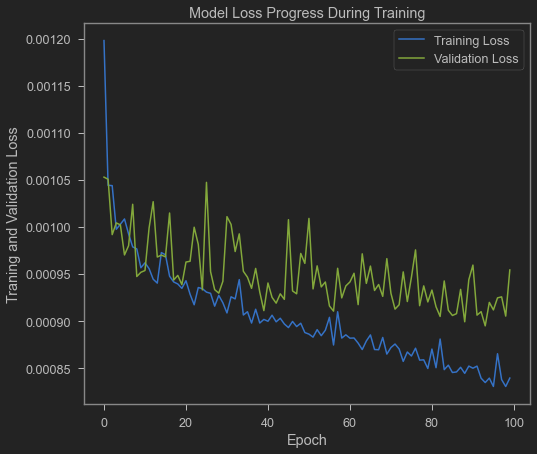

In [53]:
# let's plot the loss
plt.plot(epochs_hist.history['loss'])

# plot the validation loss
plt.plot(epochs_hist.history['val_loss'])

# add title, x-label, and y-label as well
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Traning and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Here we see the model is actually doing pretty good on the training.
However, on the validation piece it looks like the model
starts to a little bit over fit the training data in a way.
But overall the model performance is actually quite good
over the 100 epochs that we have in here.

Make a sampe run to test our trained deep neural network model performance.

Let's assume that I'm a real estate agent and I have that model on under my
disposal. And now I have a new house that I wanted to list on the market.
In this new house, I know the number of bedrooms, the number of bathrooms,
the square footage, the floors and the square foot of the basement as well.
I want to know how much would that price is gonna be.

First, we're going to define a numpy array.
We'll put:
- 4 for the number of bedrooms,
- three for the number of bathrooms, 
- 1960 for the square foot of the living, 
- 5000 for the square foot of the lot.

These are the actual values that I'm going to use.
and what I wanted to do right now.

In [56]:
# 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

# use a predict method and apply that to our trained model and feed in our testing data (X_test_1) 
# then let's see what the price will look like

# scale the data before feeding it to the model
scaler_1 = MinMaxScaler()
# apply fit_transform and pass in the testing data and store it in a variable
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

# grab the X_test_scaled_1 and feed it in to our model
y_predict_1 = model.predict(X_test_scaled_1)
# note that in the 'model' here, all intelligence, all the trained weights have been captured
# store it and generate it to y_predict_1

# grab the y_predict_1 and use inverse_transform to put it back to the original units, which is in dollar values
y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1


array([[234294.12]], dtype=float32)

The price is $234,294 which makes sense.

Next. Let's plot the predictions that are coming out from our model, which is a
price for the house versus the test, which is the ground truth.
These are the actual prices that are included in the dataset.

Text(0, 0.5, 'True Values')

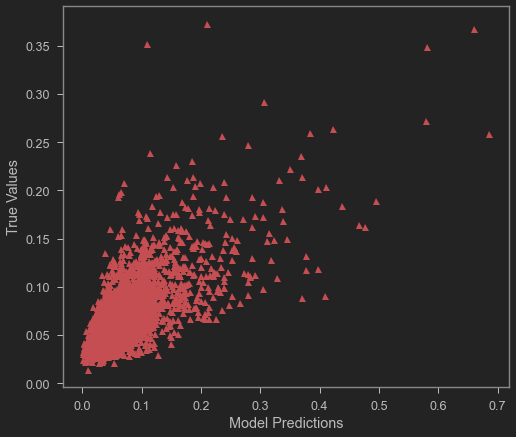

In [57]:
# first generate the y_predict value by passing along the X_test data
y_predict = model.predict(X_test)
# plot by passing along the y_test as x-axis vs. y_preidct as x-axis
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
# if we have a very good model, we should get a nice 45 degree
# angle curve indicating that the model predictions matched the ground truth data.


What we get here is an okay line per se. But it looks like the data is scattered here all over the
place, meaning that the model needs refinement. Maybe we can improve that model a little bit further.

Another point to show here is the scale. 
So the model predictions and the true values are scaled
between zero and one which is what we needed to do when we
trained our model initially.
So if we wanted to plot the exact same plot but show the actual values, the raw values in dollars,
we'll need to do the inverse transform.

In [58]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

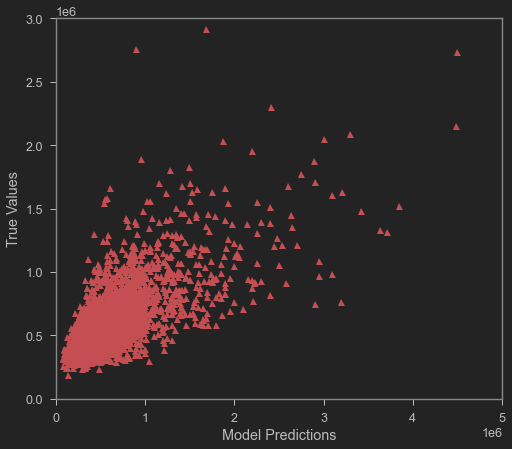

In [59]:
# let's plot it
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

Now we have the exact same data. But now we have the
units here in x_axis in dollars, which is a lot more readable compared to the previous one.

Finally, what I wanted to do is I wanted to generate all the
different metrics in here.

In [60]:
# first, obtain the length of our testing data
k = X_test.shape[1]
n = len(X_test)
n

5404

In [61]:
k

7

In [62]:
# Now let's plot the Root Mean Squared Error(RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE),
# r-squared(r2) which is the coefficient of detrmination, and the adjusted r-squared(more conservative of r2)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# print all of these values here.

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =',r2, '\nAdjusted R2 =',adj_r2)

RMSE = 251178.316 
MSE = 63090546649.79125 
MAE = 155903.44525756384 
R2 = 0.5265393792421631 
Adjusted R2 = 0.5259251790299124


What we see here is we've got a model with RMSE of quite a large number.
And the R-Squared, which is the coefficient of determination stands at 0.53
which is a very low number per se. 

Basically the coefficient of determination states that 53% of
the variations in the output are being captured within by the
variations in the input. Meaning that the model is actually
not very accurate and it's better to push that coefficient of
determination further. Maybe push it to higher like .85 or maybe .9 if possible.

# TASK #7. TRAIN AND EVALUATE A DEEP LEARNING MODEL WITH INCREASED NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [86]:
# Next, instead of using a subset or a sample of the data, we will use the entire
# full data set. So now we're going to use all of the features.
# We'll call the varaible as selected_features again.
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 
                     'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 
                     'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']

# and then we're going to grab the selected_features from our house_df
# then store it in variable X. 
X = house_df[selected_features]
# Please note what's going to happen next is pretty much the same as before.

In [87]:
# scale our data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
# take the price and that is going to be the output on our target column
y= house_df['price']

In [89]:
# scale that data. 
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

# perform train test split on the data and use 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [90]:
# use keras as well to build our model in a sequential fashion.
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# add a dense layer containing 10 neurons and note that the input dimensions right now becomes 19 as
# opposed to seven before. And we're going to use the activation function of relu.
model.add(Dense(10, input_dim = 19, activation='relu'))

# add another dense layer with 10 neurons
model.add(Dense(10, activation='relu'))

# then we're going to have one output.
model.add(Dense(1, activation='linear'))

In [91]:
# compile the model using adam optimizer and mean squared error for the loss.
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [92]:
# Now let's apply the fit method on our model
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 7.6764e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 8.2355e-04 - val_loss: 6.5407e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 7.1339e-04 - val_loss: 5.9022e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 6.4855e-04 - val_loss: 5.6158e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 6.0574e-04 - val_loss: 5.4038e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 5.7995e-04 - val_loss: 4.9214e-04
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 5.4727e-04 - val_loss: 4.6961e-04
Epoch 10/100
260/260 [=================

What we can notice here is the loss starts quite high
initially. And then it goes down. This might take some time for it to run.

Next, let's plot our history here, showing all the
different progress of the training loss and the validation
loss throughout the overall number of epochs.
Please note that this is pretty much all what we have done in the
previous tasks.

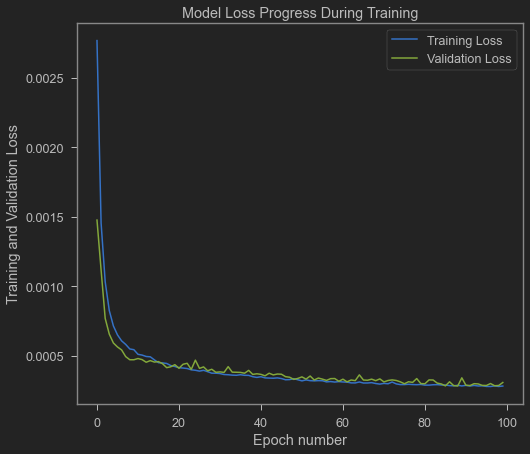

In [95]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

So what we can see here is we have the plot for the
training and validation loss.
We started quite high and then it went down afterwards
throughout with the epochs. 

And we will notice here quite
an important observation is the training loss and validation
loss, both of them are actually performing well. 
They are quite stable as opposed to before when we had our plot before where
the validation loss was actually kind of going
far away from the training loss.


Next, let's take our testing data and pass it along by using the
predict method to our train model. Then we're going to plot
the model ground truth versus predictions.

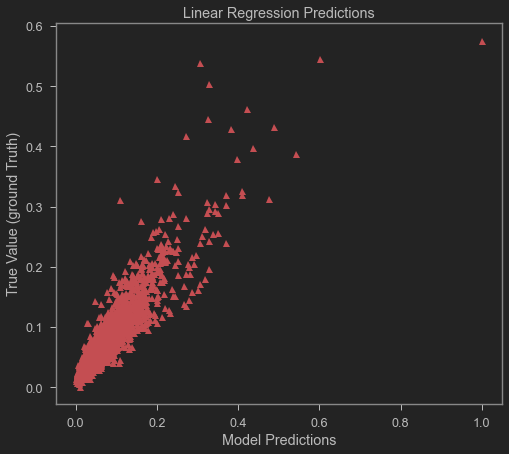

In [96]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

What we see right now is we get again the
same 45 degree line here but it's a little bit narrower
compared to before indicating that the model performance is
actually doing a little bit better compared to before.

What we'll do afterwards is take these model
predictions and the true value and scale them back to our raw
dollar value.

In [98]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [99]:
# let's plot again the Root Mean Squared Error(RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE),
# r-squared(r2) which is the coefficient of detrmination, and the adjusted r-squared(more conservative of r2)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =',r2, '\nAdjusted R2 =',adj_r2)

RMSE = 145404.18 
MSE = 21142375460.0572 
MAE = 85433.35925934493 
R2 = 0.8401283245073674 
Adjusted R2 = 0.8399209298208499


And what we see here is, now the performance of the
model actually becomes much, much better.
We achieved at 0.84 approximately coefficient of
determination.

**Extra Task#4:**
- **Change the architecture of the network to increase the coefficient of determination to at least 0.86.**  

In [ ]:
# To address this, what we can do is add two additional dense layers with 200 neurons each.
# Then the activation function is still 'relu'.

# We can uncomment the codes below to perform this:

#################################
#import tensorflow.keras
#from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import Dense
#
#model = Sequential()
#model.add(Dense(10, input_dim = 19, activation = 'relu'))
#odel.add(Dense(10, activation = 'relu'))
#odel.add(Dense(200, activation = 'relu'))
#odel.add(Dense(200, activation = 'relu'))
#
#model.add(Dense(1, activation = 'linear'))
#################################

# After that, you may run all the cells again from the start of this task (Task 7).
